MACHINE PROBLEM 3

Name: Maxyne Nuela Ignacio
Year & Section: BS Computer Science - IS - 4B

# **Step 1: Uninstall OpenCV Libraries**

In [ ]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# **Step 2: Installing Development Tools and Dependencies**

In [ ]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


# **Step 3: Cloning OpenCV from Github**

In [ ]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337922, done.
remote: Counting objects: 100% (1142/1142), done.
remote: Compressing objects: 100% (889/889), done.
remote: Total 337922 (delta 499), reused 613 (delta 212), pack-reused 336780 (from 1)
Receiving objects: 100% (337922/337922), 528.64 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (235638/235638), done.
Updating files: 100% (7568/7568), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41838, done.
remote: Counting objects: 100% (1588/1588), done.
remote: Compressing objects: 100% (1153/1153), done.
remote: Total 41838 (delta 611), reused 1041 (delta 345), pack-reused 40250 (from 1)
Receiving objects: 100% (41838/41838), 150.38 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (25744/25744), done.


# **Step 4: Building Open CV from OpenSource**

In [ ]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/sum.avx2.cpp.o
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/im

# **Step 5: Load Images**

Mounted at /content/drive


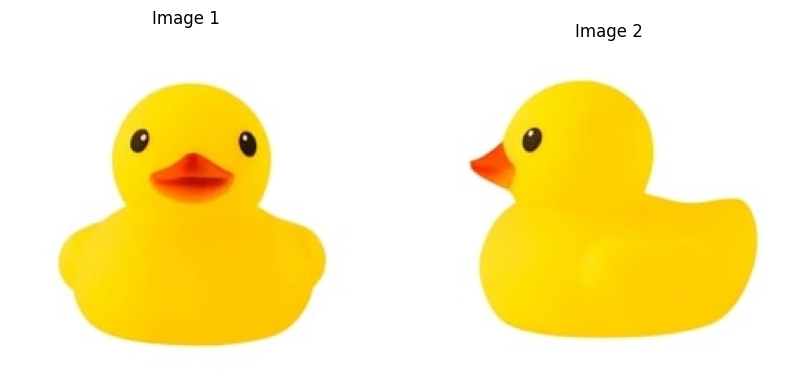

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths to your images in Google Drive
image1_path = '/content/drive/My Drive/01-MP3.jpg'
image2_path = '/content/drive/My Drive/02-MP3.jpg'

# Load the images using OpenCV
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error loading images.")
    if image1 is None:
        print("Image 1 could not be loaded. Check the file path.")
    if image2 is None:
        print("Image 2 could not be loaded. Check the file path.")
else:
    # Convert BGR images to RGB for displaying with Matplotlib
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Display the images side-by-side
    plt.figure(figsize=(10, 5))

    # Display Image 1
    plt.subplot(1, 2, 1)
    plt.title("Image 1")
    plt.imshow(image1_rgb)
    plt.axis('off')

    # Display Image 2
    plt.subplot(1, 2, 2)
    plt.title("Image 2")
    plt.imshow(image2_rgb)
    plt.axis('off')

    plt.show()


# **Step 6: Functions and Extraction**

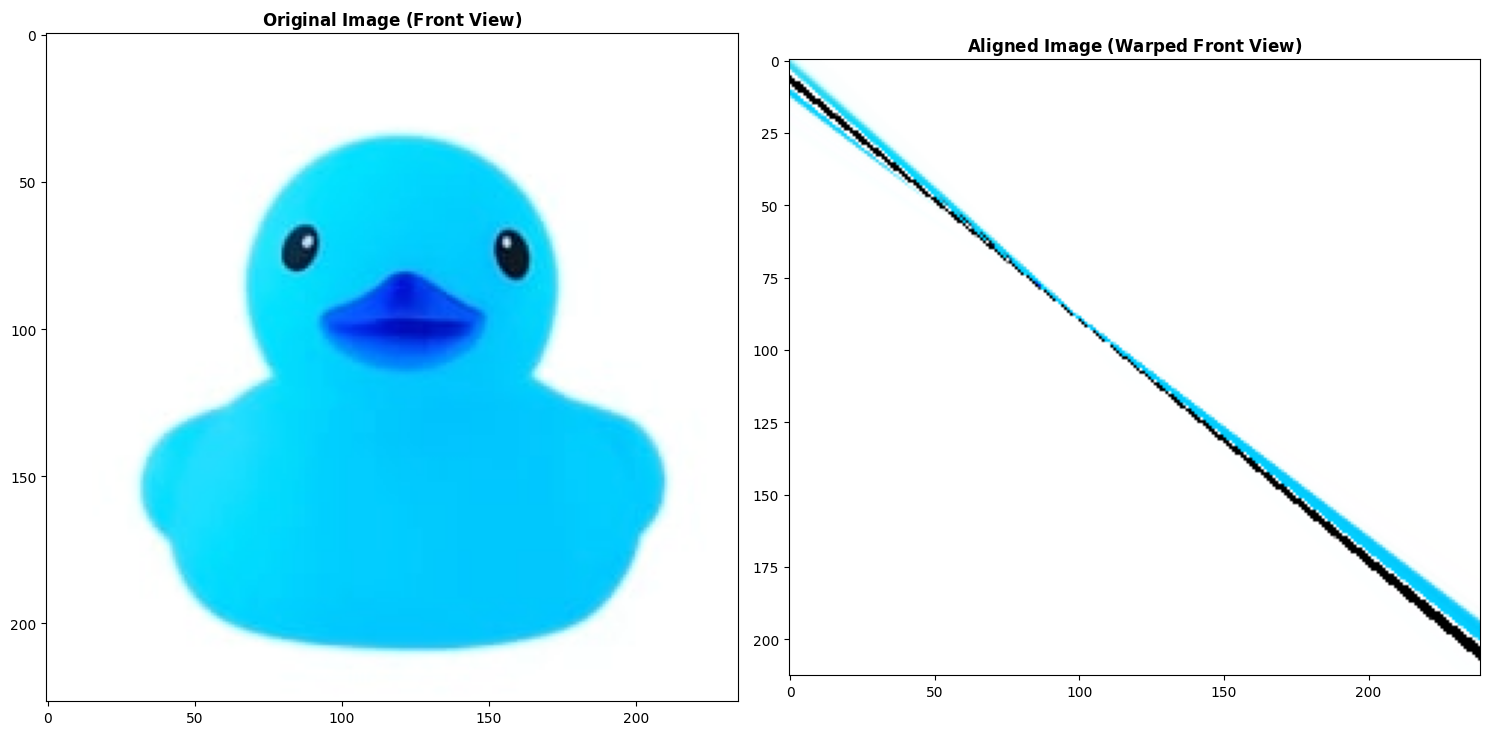

True

In [ ]:
#Function to extract keypoints and descriptors using SIFT.
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    return kp, des

#Extract features from both images using SIFT.
kp1, des1 = extract_features(image1)
kp2, des2 = extract_features(image2)

#Function for matching descriptors using Brute-Force Matcher.
def match_descriptors_bf(des1, des2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

#Match descriptors between the two images.
matches = match_descriptors_bf(des1, des2)

#Extract location of good matches.
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

#Compute the homography matrix.
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

#Warp the first image to align with the second image.
height, width = image2.shape[:2]
aligned_image = cv2.warpPerspective(image1, H, (width, height))

#Display the original and aligned images.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(r'$\bf{Original\ Image\ (Front\ View)}$')
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.title(r'$\bf{Aligned\ Image\ (Warped\ Front\ View)}$')
plt.imshow(aligned_image)
plt.tight_layout()
plt.show()

# **Step 8: Performance Analysis**

In [ ]:
#Install pandas library.
!pip install pandas

In [ ]:
#Import Libraries.
import cv2
import numpy as np
import time
import pandas as pd

#Function to analyze keypoints and descriptors for a given method.
def analyze_feature_extraction(method, image1, image2):
    start_time = time.time()

    if method == 'SIFT':
        sift = cv2.SIFT_create()
        kp1, des1 = sift.detectAndCompute(image1, None)
        kp2, des2 = sift.detectAndCompute(image2, None)

    elif method == 'SURF':
        surf = cv2.xfeatures2d.SURF_create()
        kp1, des1 = surf.detectAndCompute(image1, None)
        kp2, des2 = surf.detectAndCompute(image2, None)

    elif method == 'ORB':
        orb = cv2.ORB_create()
        kp1, des1 = orb.detectAndCompute(image1, None)
        kp2, des2 = orb.detectAndCompute(image2, None)

    end_time = time.time()

    #Calculate the number of keypoints detected and time taken.
    num_keypoints1 = len(kp1)
    num_keypoints2 = len(kp2)
    time_taken = end_time - start_time

    return num_keypoints1, num_keypoints2, time_taken, des1, des2

#Analyze each feature extraction method.
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

methods = ['SIFT', 'SURF', 'ORB']
results = {method: analyze_feature_extraction(method, image1_gray, image2_gray) for method in methods}

#Create a list for feature detection results.
feature_detection_data = []

for method, data in results.items():
    num_kp1, num_kp2, time_taken, _, _ = data
    feature_detection_data.append({
        "Method": method,
        "Keypoints Detected (Image 1)": num_kp1,
        "Keypoints Detected (Image 2)": num_kp2,
        "Time Taken (s)": time_taken
    })

#Create DataFrame for feature detection results.
feature_detection_df = pd.DataFrame(feature_detection_data)

#Display results for feature detection.
print("Feature Detection Performance Analysis:")
print(feature_detection_df.to_string(index=False))

#Function for matching descriptors using FLANN Matcher.
def match_descriptors_flann(des1, des2):
    des1 = des1.astype(np.float32)
    des2 = des2.astype(np.float32)

    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

#Function to match descriptors and analyze matching performance.
def analyze_matching(des1, des2):
    start_time_bf = time.time()
    matches_bf = match_descriptors_bf(des1, des2)
    end_time_bf = time.time()

    start_time_flann = time.time()
    matches_flann = match_descriptors_flann(des1, des2)
    end_time_flann = time.time()

    bf_time = end_time_bf - start_time_bf
    flann_time = end_time_flann - start_time_flann

    return len(matches_bf), bf_time, len(matches_flann), flann_time

#Analyze matching performance for each method.
matching_results = {}
for method, data in results.items():
    _, _, _, des1, des2 = data
    des1 = des1.astype(np.float32)
    des2 = des2.astype(np.float32)

    matching_results[method] = analyze_matching(des1, des2)

#Create a list for matching performance results.
matching_performance_data = []

for method, data in matching_results.items():
    num_matches_bf, time_bf, num_matches_flann, time_flann = data
    matching_performance_data.append({
        "Method": method,
        "Matches (Brute-Force)": num_matches_bf,
        "Time Taken (BF)": time_bf,
        "Matches (FLANN)": num_matches_flann,
        "Time Taken (FLANN)": time_flann
    })

#Create DataFrame for matching performance results.
matching_performance_df = pd.DataFrame(matching_performance_data)

#Display results for matching performance.
print("\nFeature Matching Performance Analysis:")
print(matching_performance_df.to_string(index=False))

Feature Detection Performance Analysis:
Method  Keypoints Detected (Image 1)  Keypoints Detected (Image 2)  Time Taken (s)
  SIFT                            25                            14        0.033574
  SURF                            46                            23        0.033629
   ORB                           119                            54        0.004946

Feature Matching Performance Analysis:
Method  Matches (Brute-Force)  Time Taken (BF)  Matches (FLANN)  Time Taken (FLANN)
  SIFT                      9         0.001587                3            0.000604
  SURF                     10         0.001479                7            0.001054
   ORB                     19         0.001698                3            0.003907
